# Modelo Barabási-Albert

## Algoritmo

La red empieza con $m_{0}$ nodos conectados.

Se agregan nuevos nodos a la red, uno a la vez. Cada nodo nuevo se conecta con $m<m_{0}$ de los nodos ya existentes con una probabilidad proporcional al número de vínculos que tienen. La probabilidad de que un nodo nuevo se conecte a un nodo $i$ ya existente está dada por:

$p_{i}=\frac{k_{i}}{\sum_{j}k_{j}}$

donde $k_{i}$ es el grado de conectividad del nodo $i$ y la sumatoria ocurre sobre los $j$ nodos ya existentes.

In [1]:
import networkx as nx
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def distribucion_p(h):
    """
    Devuelve un pool de IDs de nodos
    con ocurrencias proporcionales a la probabilidad de conexion
    del modelo Barabasi-Albert
    """
    pool = []
    for n in h.nodes:
        deg = h.degree[n]
        pool += [n,] * deg   # esta multiplicción crea una lista 
                             # con *deg* numero de elementos *n*
    return pool

def agrega_nodos(h, i, m):
    # nodo nuevo
    h.add_node(i)
    
    # se eligen m nodos
    targets = random.sample(distribucion_p(h),
                            m)
    # se conectan
    for t in targets:
        h.add_edge(i, t)

In [3]:
def plot_12_nw(nets, layout=nx.spring_layout, node_color='crimson', alpha=0.8, times=True):
    """
    Plotea doce redes en una tabla, casi siempre en secuencia.
    """
    plt.figure(1, dpi=160)
    for i in range(12):
        g = nets[i]
        pos = layout(g)
        ax = plt.subplot(3, 4, i+1)
        ax.set_axis_off()
        if times:
            ax.set_title("$t=%s$" % i, fontsize=6, y=0.92)
        plt.xticks([]), plt.yticks([])
        nodos = sorted(list(g.nodes()))
        deg = [v[1]*10 for v in g.degree(nodos)]        
        nx.draw_networkx_nodes(g, pos,
                               nodelist=nodos,
                               node_color=node_color,
                               node_size=deg,
                               alpha=alpha)
        nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.5)

# Condiciones Iniciales: $m_{0}=2, m=1$

In [4]:
g = nx.Graph()
g.add_node(0)
g.add_node(1)
g.add_edge(0, 1)

In [5]:
pools_t = []  # para guardar el pool de donde se eligen nodos para conectarlos a los nuevos
nets_m1_t = []   # para guardar copias de la red en cada t
for i in range(2, 14):
    pools_t.append(distribucion_p(g))
    nets_m1_t.append(g.copy())
    agrega_nodos(g, i, 1)  # m = 1

## Probabilidades al agregar nodos

En la siguiente tabla cada renglón muestra la lista de entre la que se eligió $m$ nodos para conectarlos a cada nodo nuevo. Los números representan los nodos, se repiten en proporción a su grado de conectividad, lo que hace que la probabilidad de elegirlos sea precisamente $p_{i}=\frac{k_{i}}{\sum_{j}k_{j}}$, o sea una proporción entre el grado del i-ésimo nodo y todos los grados de los demás nodos.

In [6]:
pools_t

[[0, 1],
 [0, 0, 1, 2],
 [0, 0, 0, 1, 2, 3],
 [0, 0, 0, 0, 1, 2, 3, 4],
 [0, 0, 0, 0, 0, 1, 2, 3, 4, 5],
 [0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6],
 [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12]]

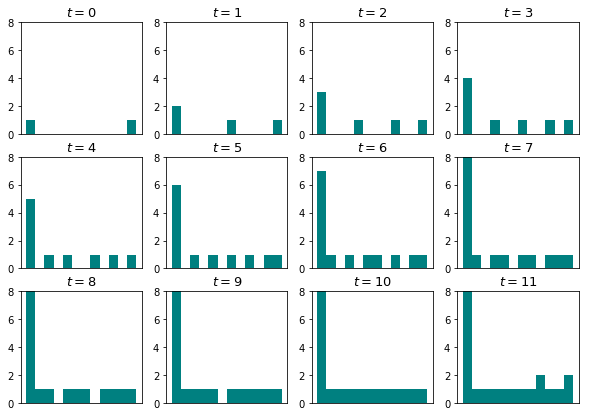

In [7]:
plt.figure(figsize=(10, 7))
for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    ax.set_title("$t=%s$" % i, fontsize=13)
    plt.ylim([0, 8])
    plt.xticks([])
    plt.hist(pools_t[i], bins=12, color='teal')

## Surgimiento de *hubs*

Se puede ver cómo van sugiendo *hubs* con cada nodo que se agrega. 

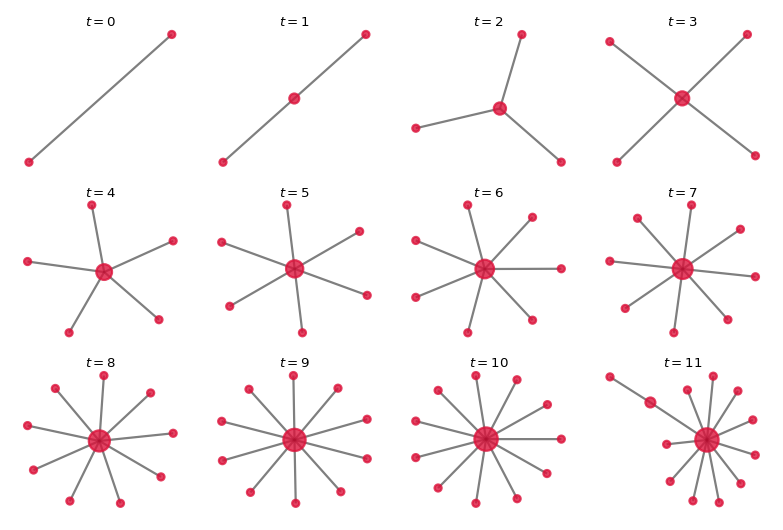

In [8]:
plot_12_nw(nets_m1_t)

# Condiciones Iniciales: $m_{0}=m=2$

In [9]:
g = nx.Graph()
g.add_node(0)
g.add_node(1)
g.add_edge(0, 1)

In [10]:
pools_t = []
nets_m2_t = []
for i in range(2, 14):
    pools_t.append(distribucion_p(g))
    nets_m2_t.append(g.copy())
    agrega_nodos(g, i, 2)  # m = 2

## Distribución poquito más homogenea de $p_{i}$

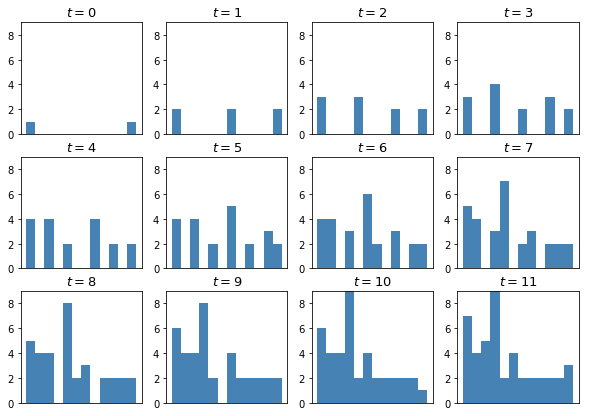

In [11]:
plt.figure(figsize=(10, 7))
for i in range(12):
    ax = plt.subplot(3, 4, i+1)
    ax.set_title("$t=%s$" % i, fontsize=13)
    plt.ylim([0, 9])
    plt.xticks([])
    plt.hist(pools_t[i], bins=12, color='steelblue')

## Más triángulos, más *clustering* 

Conforme crece la red los dos nodos a los que cada nuevo se conectará serán los mismos, creando siempre triángulos.

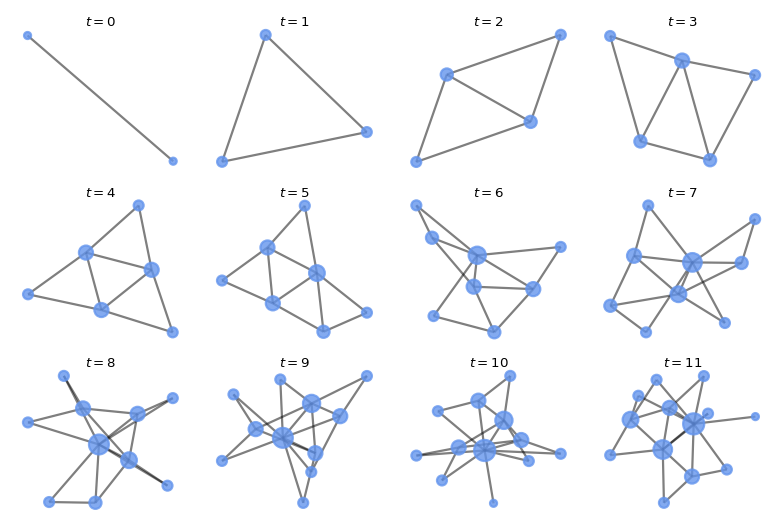

In [12]:
plot_12_nw(nets_m2_t, node_color='cornflowerblue')

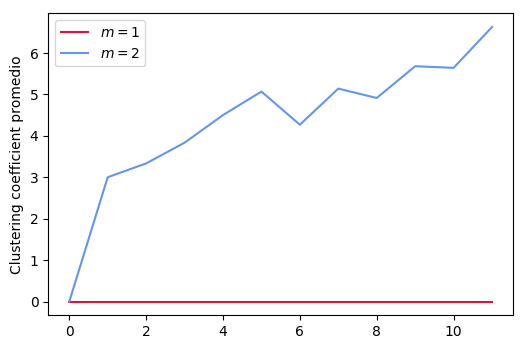

In [13]:
fig = plt.figure(dpi=100)
line1 = plt.plot([sum(dict(nx.clustering(h)).values()) for h in nets_m1_t], label="$m=1$", color='crimson')
line2 = plt.plot([sum(dict(nx.clustering(h)).values()) for h in nets_m2_t], label="$m=2$", color='cornflowerblue')
plt.ylabel('Clustering coefficient promedio')
l = plt.legend()

# Contraste de $m=1, m=2, m=3$

In [14]:
g1 = nx.Graph()
g1.add_node(0)
g1.add_node(1)
g1.add_edge(0, 1)

g2 = g1.copy()

g3 = g1.copy()
g3.add_node(2)
g3.add_edge(0,2)

m1_t = []
m2_t = []
m3_t = []
for i in range(2, 400):
    m1_t.append(g1.copy())
    m2_t.append(g2.copy())
    m3_t.append(g3.copy())
    agrega_nodos(g1, i, 1)
    agrega_nodos(g2, i, 2)
    agrega_nodos(g3, i, 3)

## Vínculos

El crecimiento de vínculos es lineal y proporcional a $m$: con $m=1$ para 200 nodos hay 200 vínculos pues se agrega uno con cada nodo. Para $m=2$, con $n=200$ nodos la cantidad de vínculos es $n\cdot m=400$ y para $m=3$ los vínculos son $n\cdot m=600$.

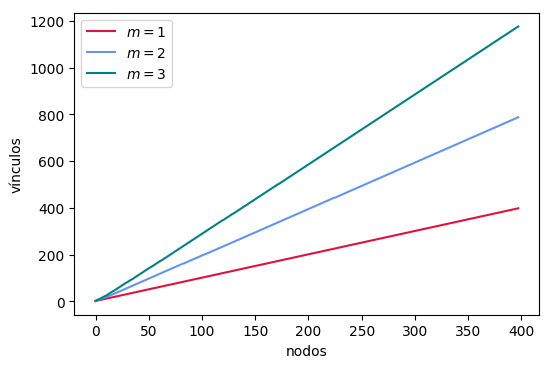

In [15]:
fig = plt.figure(dpi=100)
line1 = plt.plot([len(h.edges) for h in m1_t], label="$m=1$", color="crimson")
line2 = plt.plot([len(h.edges) for h in m2_t], label="$m=2$", color="cornflowerblue")
line3 = plt.plot([len(h.edges) for h in m3_t], label="$m=3$", color="teal")
plt.xlabel('nodos')
plt.ylabel('vínculos')
plt.legend()

## Conectividad promedio

La conectividad promedio tiende a $2m$.

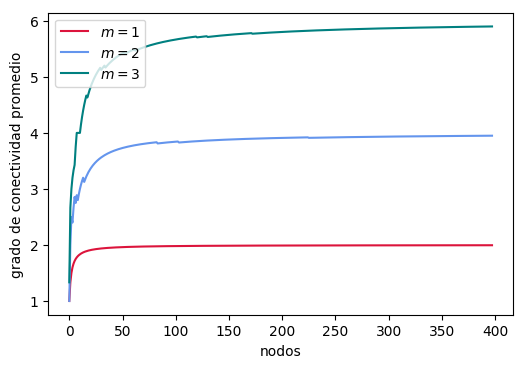

In [16]:
fig = plt.figure(dpi=100)
line1 = plt.plot([np.mean([v[1] for v in list(nx.degree(h))]) for h in m1_t], label="$m=1$", color="crimson")
line2 = plt.plot([np.mean([v[1] for v in list(nx.degree(h))]) for h in m2_t], label="$m=2$", color="cornflowerblue")
line3 = plt.plot([np.mean([v[1] for v in list(nx.degree(h))]) for h in m3_t], label="$m=3$", color="teal")
plt.xlabel('nodos')
plt.ylabel('grado de conectividad promedio')
l = plt.legend()

## Clustering promedio

Aún con muchos nodos, para las redes creciendo con $m=1$ no hay clustering. En el largo plazo, ¿más $m$ significará más clustering? En el corto: sí.

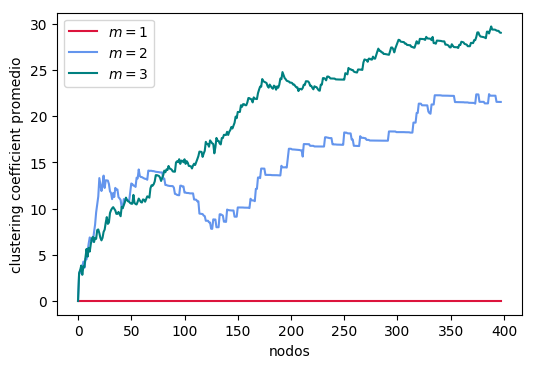

In [17]:
fig = plt.figure(dpi=100)
line1 = plt.plot([sum(dict(nx.clustering(h)).values()) for h in m1_t], label="$m=1$", color="crimson")
line2 = plt.plot([sum(dict(nx.clustering(h)).values()) for h in m2_t], label="$m=2$", color="cornflowerblue")
line3 = plt.plot([sum(dict(nx.clustering(h)).values()) for h in m3_t], label="$m=3$", color="teal")
plt.xlabel('nodos')
plt.ylabel('clustering coefficient promedio')
plt.legend()

## Average Shortest Path Length

La red creciendo con $m=1$ tiene menos atajos debido a su bajo clustering, luego es de esperar que sus caminos más cortos sean los más largos de las tres.

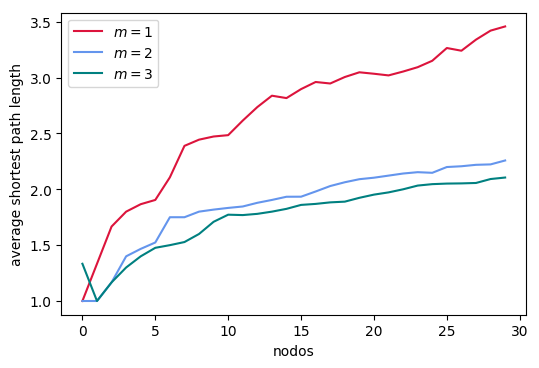

In [18]:
fig = plt.figure(dpi=100)
line1 = plt.plot([nx.average_shortest_path_length(h) for h in m1_t[:30]], label="$m=1$", color="crimson")
line2 = plt.plot([nx.average_shortest_path_length(h) for h in m2_t[:30]], label="$m=2$", color="cornflowerblue")
line3 = plt.plot([nx.average_shortest_path_length(h) for h in m3_t[:30]], label="$m=3$", color="teal")
plt.xlabel('nodos')
plt.ylabel('average shortest path length')
plt.legend()

## Hairballs con 100 nodos

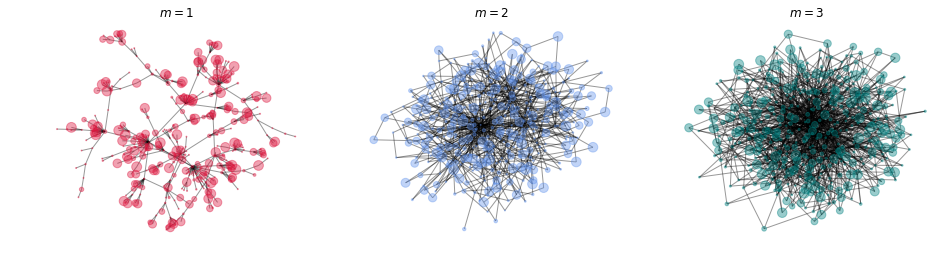

In [19]:
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1, 3, 1)
nx.draw(m1_t[-1], node_size=m1_t[100].degree(), node_color='crimson', alpha=0.4)
ax1.set_title("$m=1$")
ax2 = plt.subplot(1, 3, 2)
nx.draw(m2_t[-1], node_size=m2_t[100].degree(), node_color='cornflowerblue', alpha=0.4)
ax2.set_title("$m=2$")
ax3 = plt.subplot(1, 3, 3)
nx.draw(m3_t[-1], node_size=m3_t[100].degree(), node_color='teal', alpha=0.4)
title = ax3.set_title("$m=3$")

## Crecimiento en arreglo circular

- Los tres renglones son respectivamente para $m=1, m=2, m=3$.
- Las cuatro columnas representan iteraciones de agregar nodos, respectivamente: 3, 15, 30 y 50.

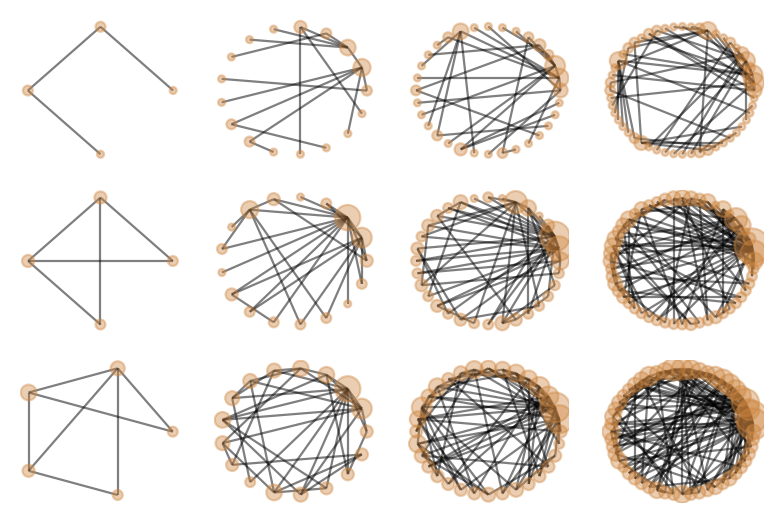

In [20]:
plot_12_nw([m1_t[2], m1_t[15], m1_t[30], m1_t[50], 
            m2_t[2], m2_t[15], m2_t[30], m2_t[50], 
            m3_t[3], m3_t[15], m3_t[30], m3_t[50]],
            node_color='peru', alpha=0.4, times=False, layout=nx.circular_layout)

# Distribución de grados de conectividad

La distribución de grados de conectividad sigue una ley de potencias.

Esta gráfica log-log muestra el fenómeno de libertad de escala: en cualquier grado de acercamiento son pocos nodos con altos grados de conectividad, muchos con poco, en las mismas proporciones.

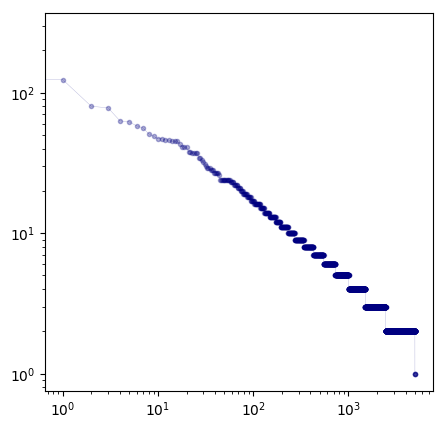

In [21]:
g4 = nx.Graph()
g4.add_node(0)
g4.add_node(1)
g4.add_edge(0, 1)

# una red con cincomil nodos
for i in range(1, 5000):
    agrega_nodos(g4, i, 2)

fig = plt.figure(figsize=(5, 5), dpi=100)
degree_sequence=sorted(dict(nx.degree(g4)).values(), reverse=True)
f = plt.loglog(degree_sequence, marker='.', linewidth=0.3, color='navy', alpha=0.3)